Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers...


In [1]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
390,43,No,Travel_Rarely,982,Research & Development,12,3,Life Sciences,1,520,...,3,80,1,25,3,3,25,10,3,9


In [8]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
data['Attrition'].unique()

#This is a classification problem since the target variable/label column has categorical type of data.

array(['Yes', 'No'], dtype=object)

In [11]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# EDA

In [12]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Data visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

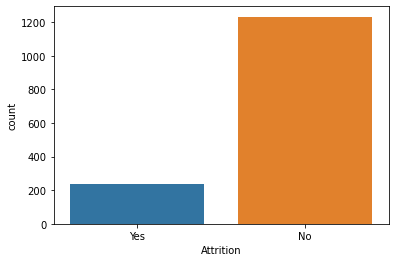

In [13]:
sns.countplot(x=data['Attrition'])

In [14]:
numeric_colm=list(data.select_dtypes(include=np.number).columns)
categorical_colm=list(data.select_dtypes(include=object).columns)

In [15]:
categorical_colm

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [16]:
numeric_colm

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

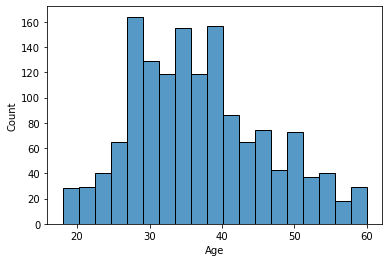

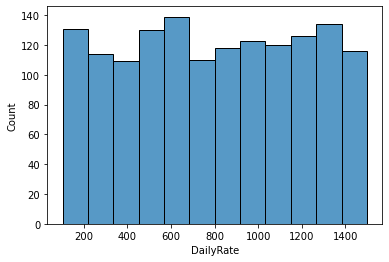

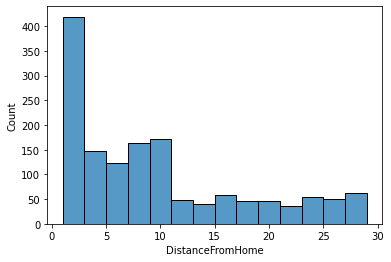

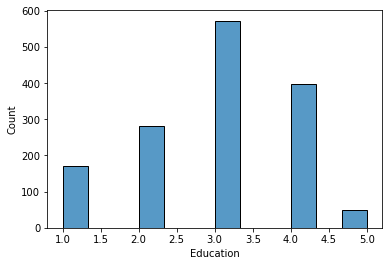

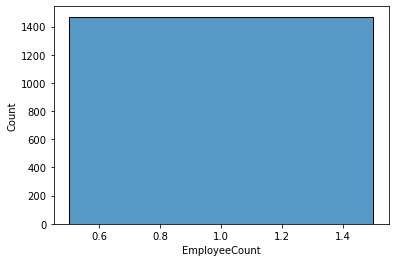

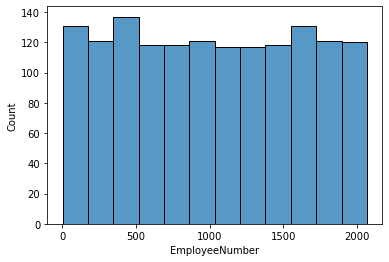

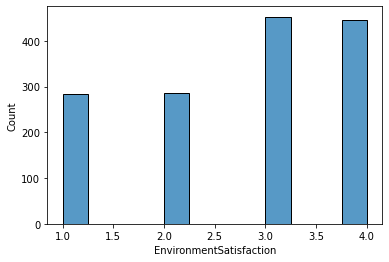

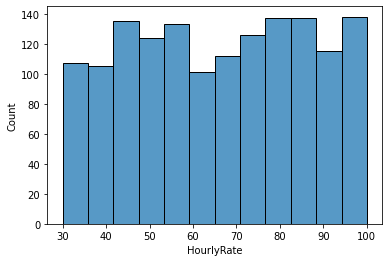

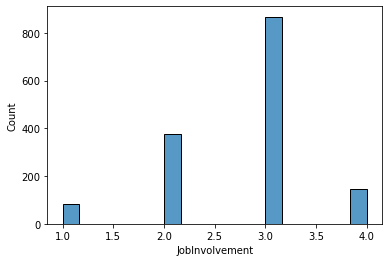

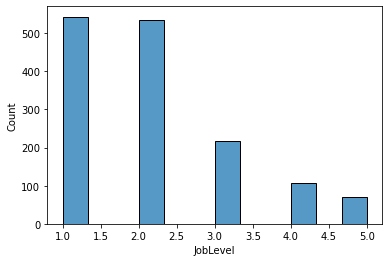

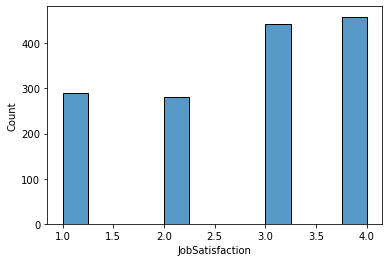

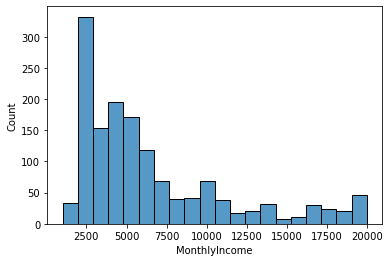

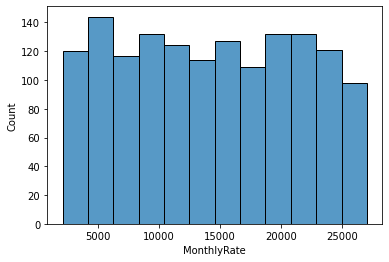

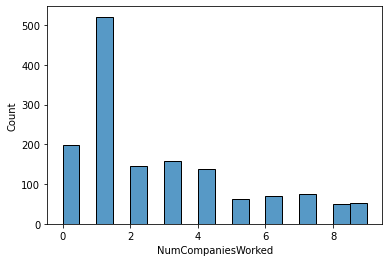

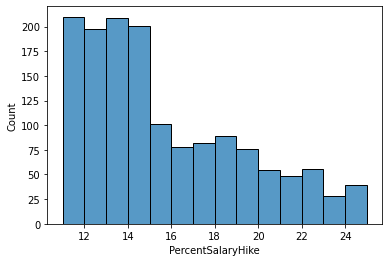

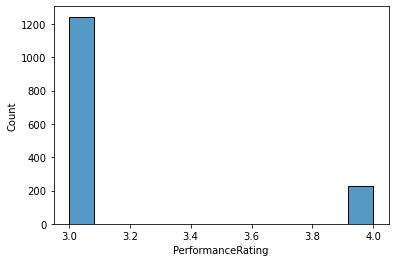

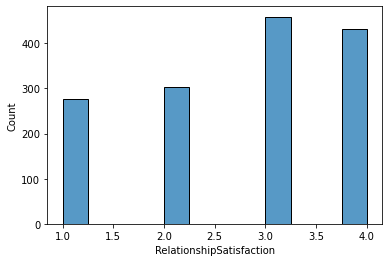

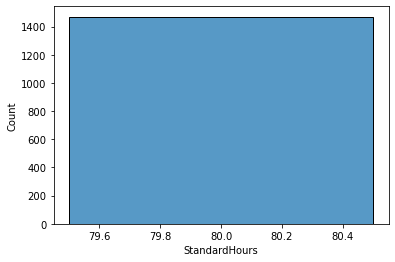

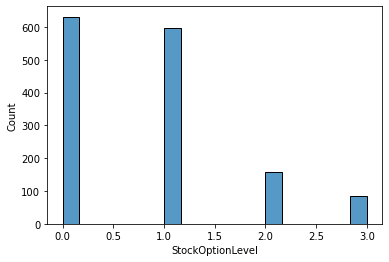

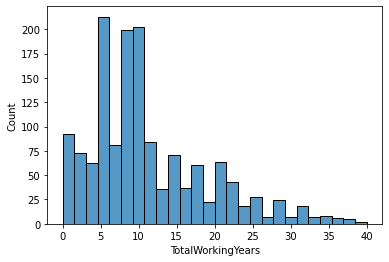

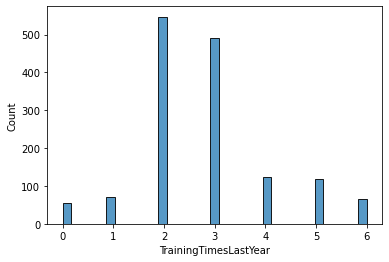

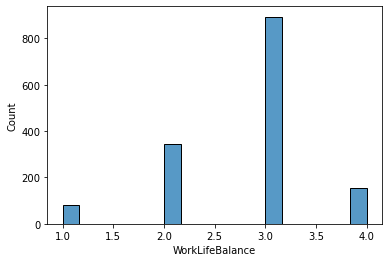

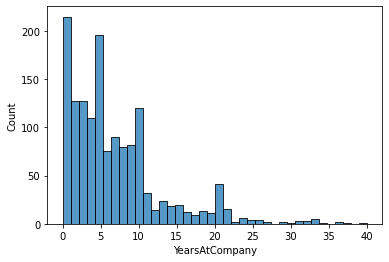

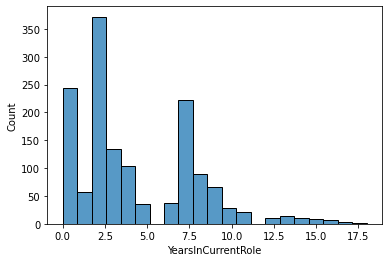

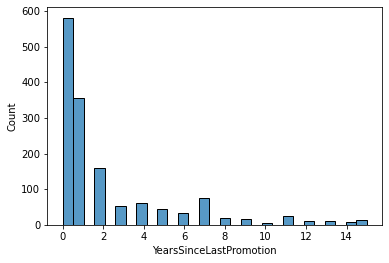

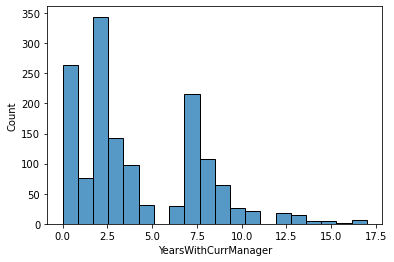

In [17]:
for colm in numeric_colm:
    sns.histplot(x=data[colm])
    plt.show()

Attriton present in 'yes 'and"no" dataset,let's change in Encoding form ...

# Label Encoder

In [18]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
data['Attrition']= label_encoder.fit_transform(data['Attrition'])

In [20]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [21]:
data.iloc[1469,:]

Age                                             34
Attrition                                        0
BusinessTravel                       Travel_Rarely
DailyRate                                      628
Department                  Research & Development
DistanceFromHome                                 8
Education                                        3
EducationField                             Medical
EmployeeCount                                    1
EmployeeNumber                                2068
EnvironmentSatisfaction                          2
Gender                                        Male
HourlyRate                                      82
JobInvolvement                                   4
JobLevel                                         2
JobRole                      Laboratory Technician
JobSatisfaction                                  3
MaritalStatus                              Married
MonthlyIncome                                 4404
MonthlyRate                    

# Making dataFrame for nominal data

In [22]:
df_visualization_nominal=data[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']].copy()

In [23]:
df_visualization_nominal.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


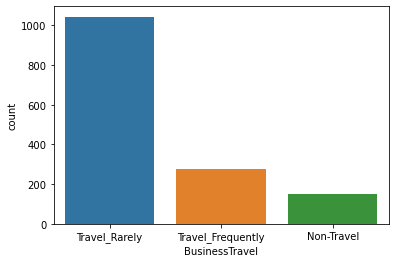

In [24]:
ax=sns.countplot(x="BusinessTravel",data=df_visualization_nominal)
print(df_visualization_nominal["BusinessTravel"].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


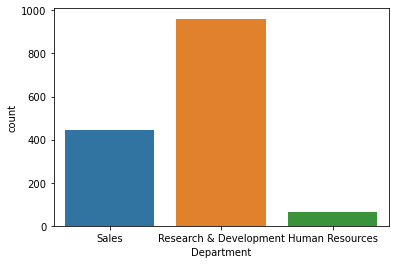

In [25]:
ax=sns.countplot(x="Department",data=df_visualization_nominal)
print(df_visualization_nominal["Department"].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


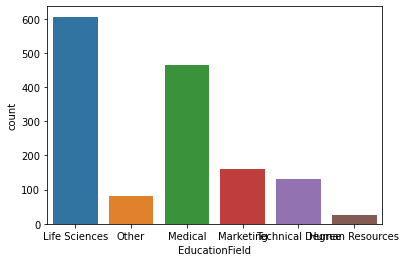

In [26]:
ax=sns.countplot(x="EducationField",data=df_visualization_nominal)
print(df_visualization_nominal["EducationField"].value_counts())

Male      882
Female    588
Name: Gender, dtype: int64


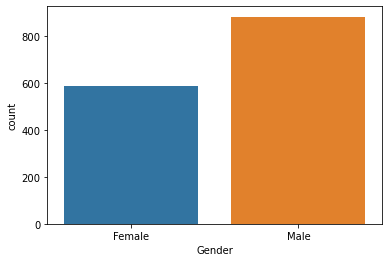

In [27]:
ax=sns.countplot(x="Gender",data=df_visualization_nominal)
print(df_visualization_nominal["Gender"].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


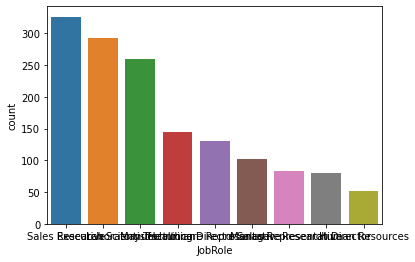

In [28]:
ax=sns.countplot(x="JobRole",data=df_visualization_nominal)
print(df_visualization_nominal["JobRole"].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


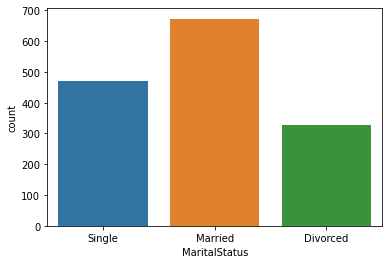

In [29]:
ax=sns.countplot(x="MaritalStatus",data=df_visualization_nominal)
print(df_visualization_nominal["MaritalStatus"].value_counts())

Y    1470
Name: Over18, dtype: int64


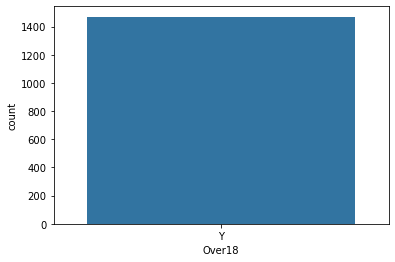

In [30]:
ax=sns.countplot(x="Over18",data=df_visualization_nominal)
print(df_visualization_nominal["Over18"].value_counts())

No     1054
Yes     416
Name: OverTime, dtype: int64


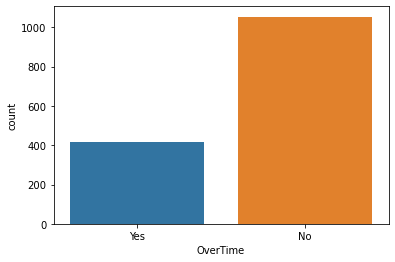

In [31]:
ax=sns.countplot(x="OverTime",data=df_visualization_nominal)
print(df_visualization_nominal["OverTime"].value_counts())

# Making DataFrame  for continuous data

In [32]:
df_visualization_continuous=data[['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',
                               'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
                               'PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
                               'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                               'YearsWithCurrManager']].copy()

In [33]:
df_visualization_continuous.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [34]:
df_visualization_continuous.shape

(1470, 26)

In [35]:
df_visualization_continuous.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# Encoding of DataFrame

In [36]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [37]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [38]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [39]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# plotting heat map

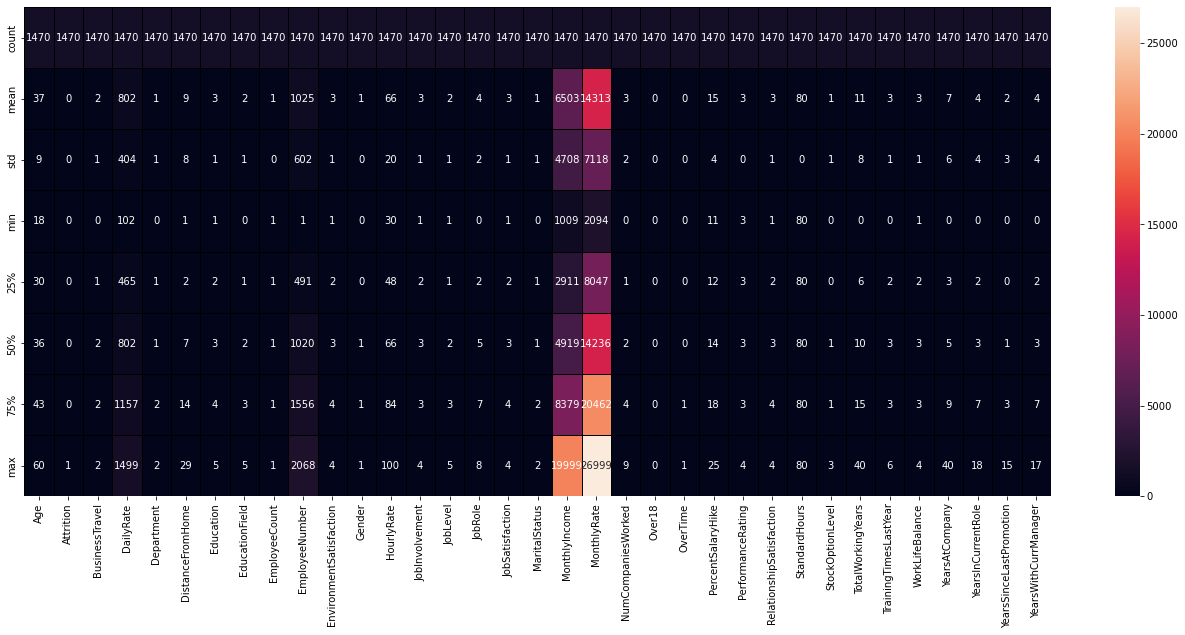

In [40]:

plt.figure(figsize = (23,9))
sns.heatmap(data.describe(),annot = True,linewidths=1,linecolor='black',fmt="1.0f")
plt.show()

In [41]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Correlation of the column with the target columns

In [42]:
data.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

we can see that here very less correlation b/w EmployeeCount,over18,StandardHours,employmentnumber.let's drop this column..

In [43]:
data.drop('EmployeeCount', axis = 1, inplace = True)
data.drop('StandardHours', axis = 1, inplace = True)
data.drop('EmployeeNumber', axis = 1, inplace = True)
data.drop('Over18', axis = 1, inplace = True)
print(data.shape)

(1470, 31)


In [44]:
data.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

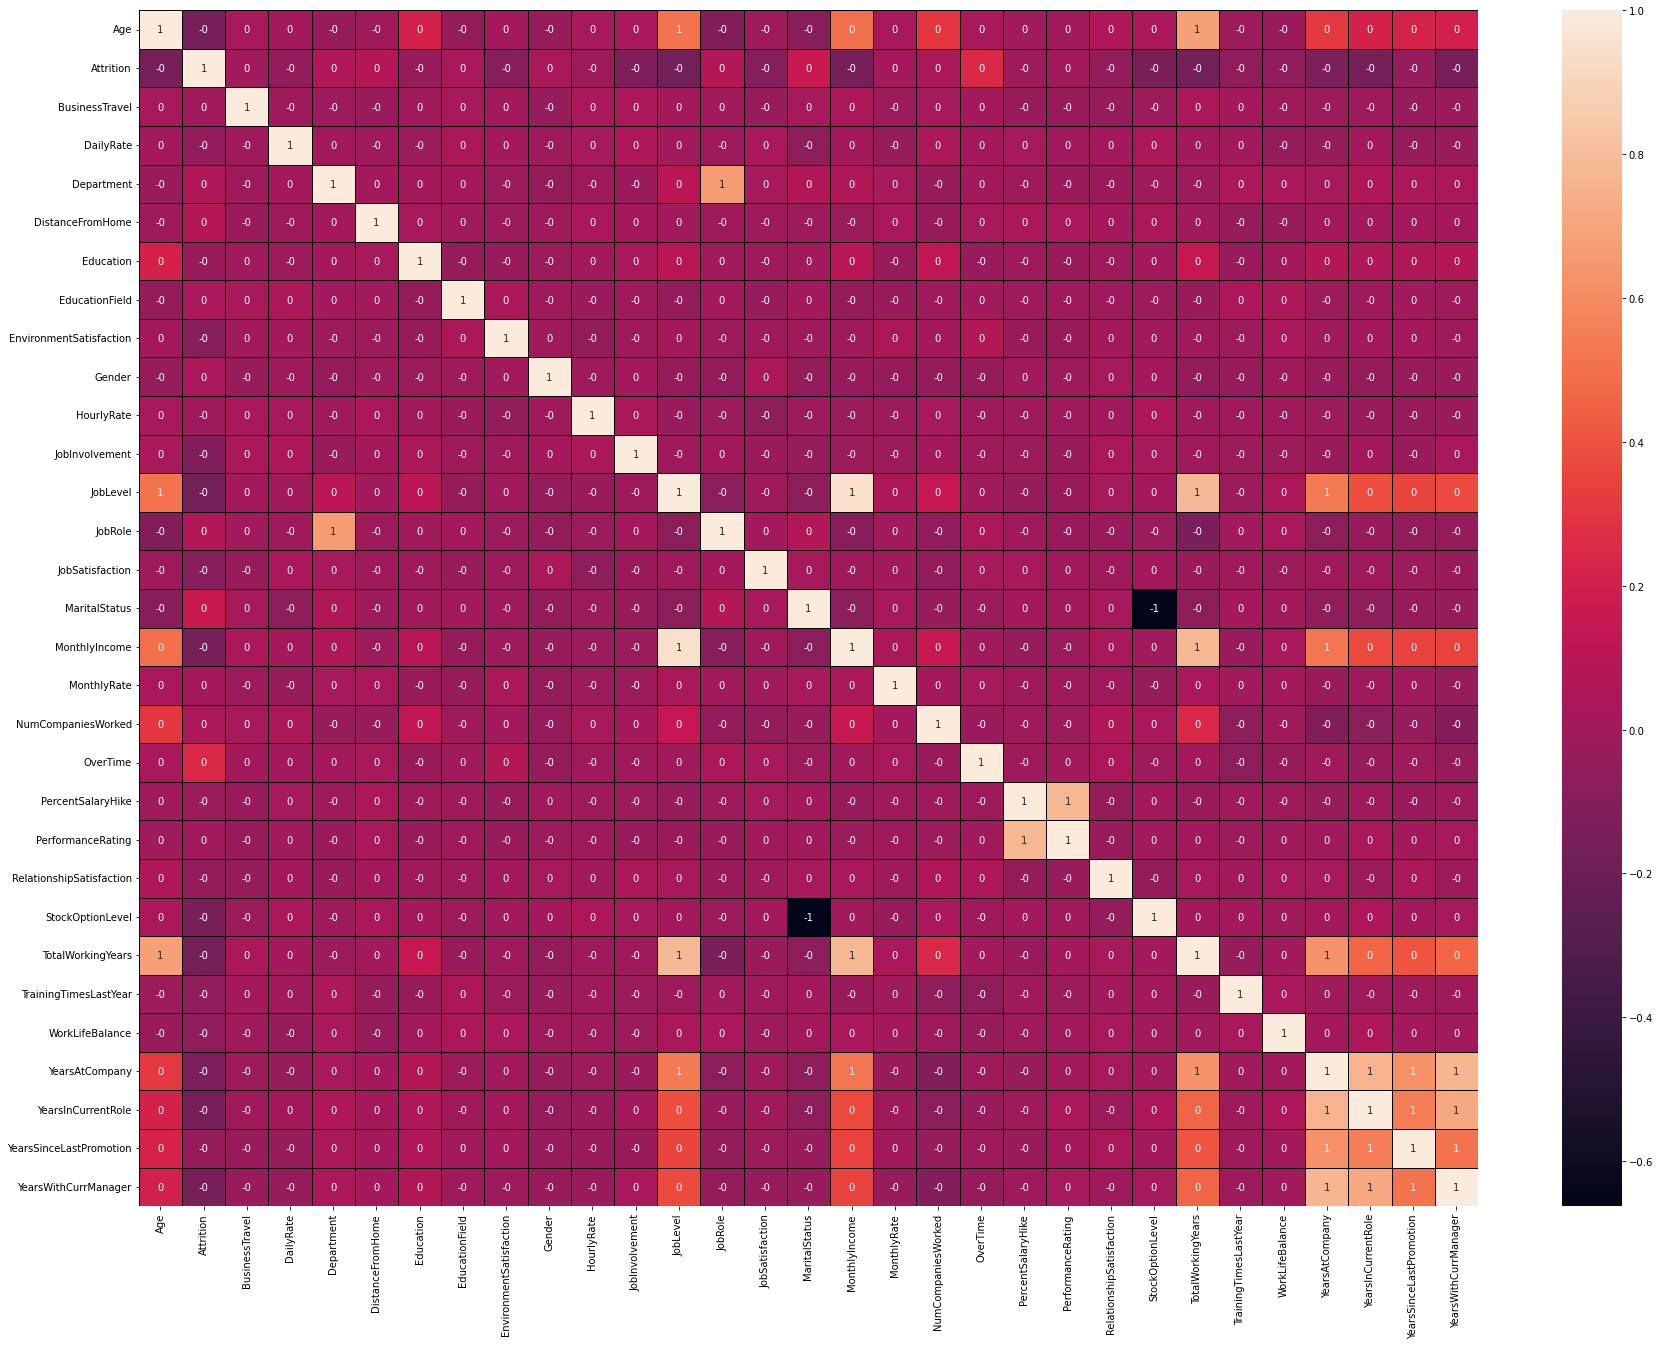

In [45]:
plt.figure(figsize = (30,22))
sns.heatmap(data.corr(),annot = True,linewidths=.5,linecolor='black',fmt="1.0f")
plt.show()

this showes very confusing plot because i did not find accurate value so let's check the which is possitive correlated and which is negative

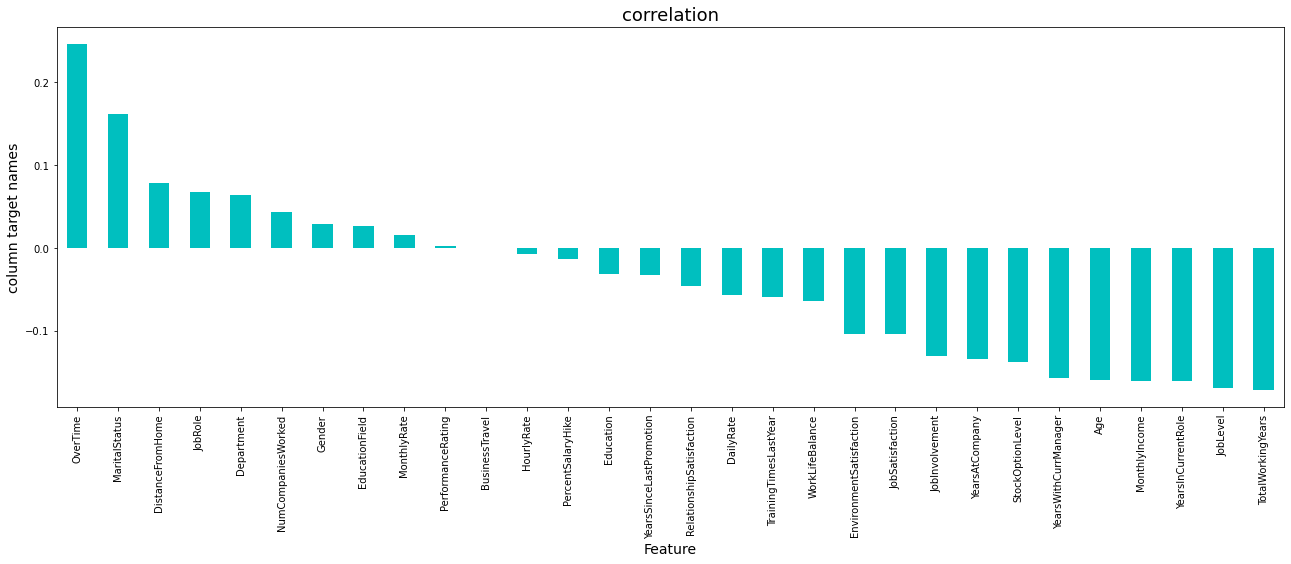

In [46]:
plt.figure(figsize=(22,7))
data.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

here no relation b/w target to bussiness travel, hourly rate, performing rating...

# Checking for skewness

In [47]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

# Dist plot

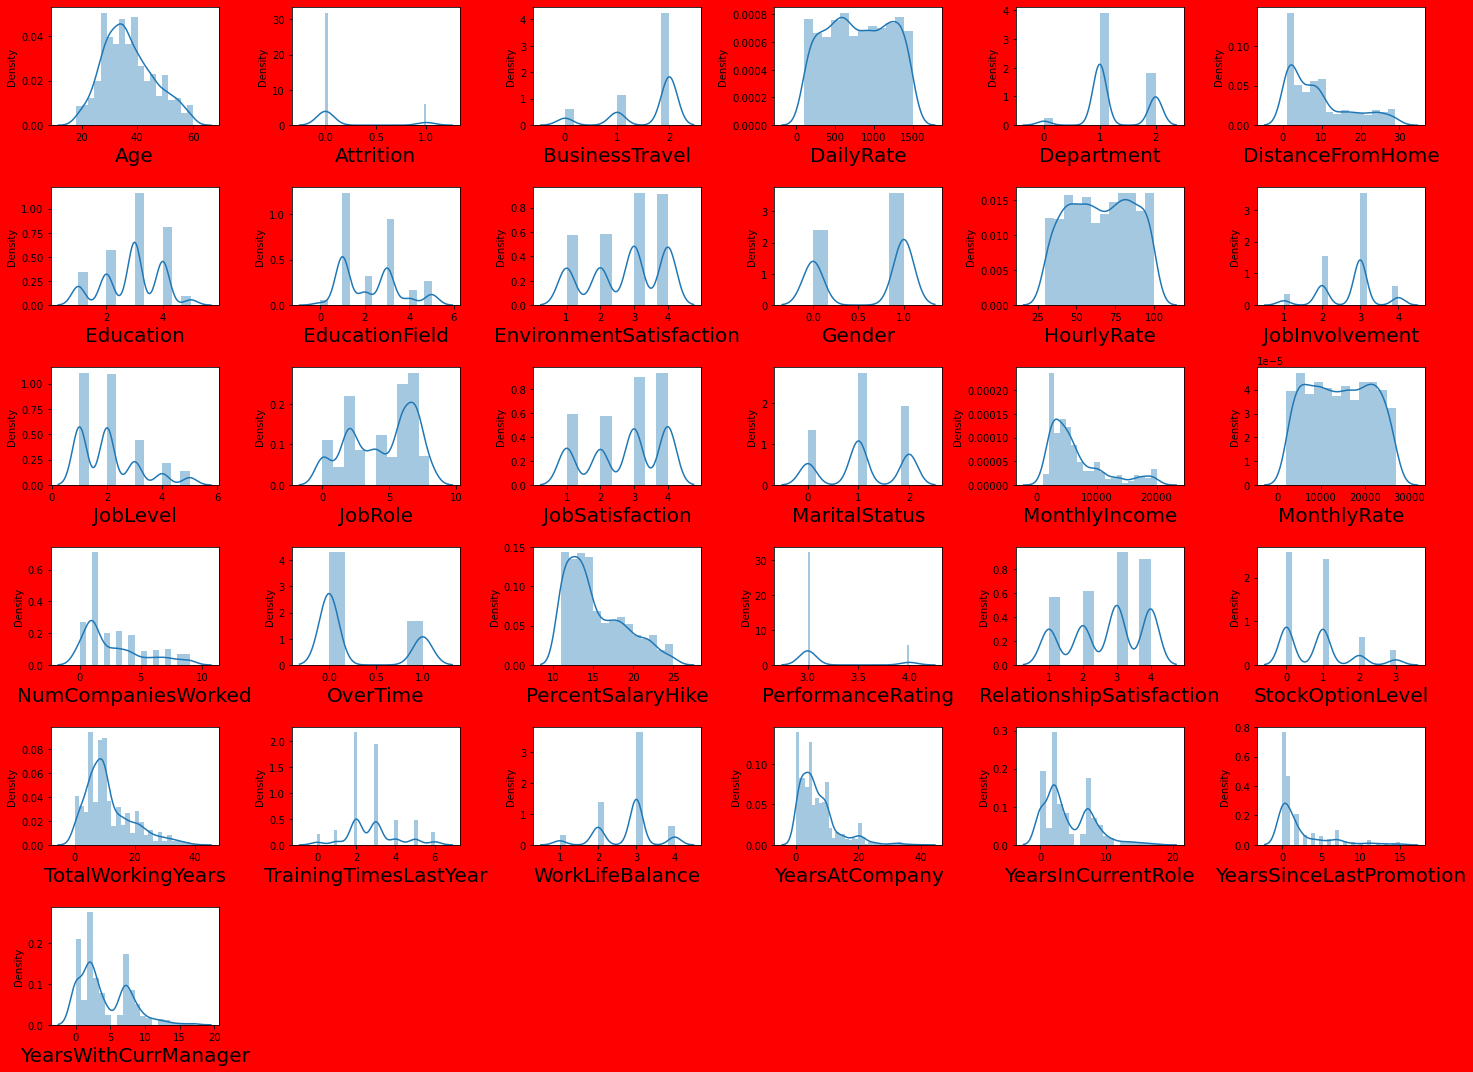

In [48]:
# visualizing data distribution in every column
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=31:   # there are 12 column is the given data
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

here maximum skewness present in all features...

# checking outliers using BOX plot

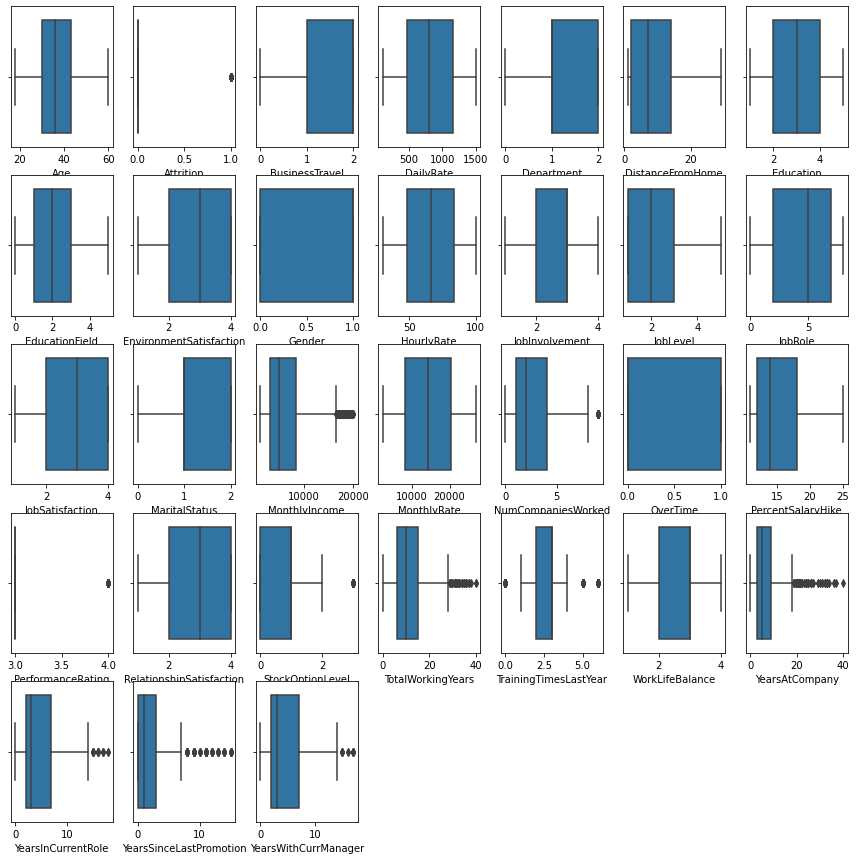

In [49]:
#show the outliers using box plot
plt.figure(figsize=(15,15))
graph = 1

for column in data:
    if graph<=31:   # there are 11 column is the given data
        plt.subplot(5,7,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    graph+=1
plt.show()

here many outliers present in many columns,  let's removed it by appliyeng Z-Transformed method

# Z score method to remove outliers

In [50]:
A= data.copy()

from scipy.stats import zscore

zscor = zscore(A)
zabs = np.abs(zscor)
df = A[(zabs <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(A.shape)

(1387, 31)
(1470, 31)


In [51]:
# Checking the dataloss in %

loss = (1470-1387)/1470*100
loss

5.646258503401361

here data loss is very minor..let's move

In [52]:

df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [53]:
data = df.copy()
feat = ['YearsSinceLastPromotion','YearsAtCompany','PerformanceRating','TotalWorkingYears','MonthlyIncome','JobLevel']

skewdf = data[feat].copy()

In [54]:
#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

YearsSinceLastPromotion         NaN
YearsAtCompany                  NaN
PerformanceRating          1.931566
TotalWorkingYears               NaN
MonthlyIncome              0.318593
JobLevel                   0.261201
dtype: float64

In [55]:
# Trying power transform method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
df1 = data[feat].copy()
df1.skew()

YearsSinceLastPromotion    1.756335
YearsAtCompany             1.248623
PerformanceRating          1.931566
TotalWorkingYears          1.034487
MonthlyIncome              1.544770
JobLevel                   1.126075
dtype: float64

In [56]:
transformed = powtrans.fit_transform(df1)

transformed = pd.DataFrame(transformed, columns =df1.columns)
transformed.skew()

YearsSinceLastPromotion    0.212301
YearsAtCompany            -0.025230
PerformanceRating          0.000000
TotalWorkingYears         -0.009666
MonthlyIncome              0.027700
JobLevel                   0.110769
dtype: float64

In [57]:
skewdf.skew()

YearsSinceLastPromotion         NaN
YearsAtCompany                  NaN
PerformanceRating          1.931566
TotalWorkingYears               NaN
MonthlyIncome              0.318593
JobLevel                   0.261201
dtype: float64

comparing both transform Log Transformer and Power Transformer method, it is determined that Power Transformer gives better result.

In [58]:

transformed.index = data.index
data[feat] = transformed[feat]
x = data.drop(columns = ['Attrition'])
y = data['Attrition']
x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           0.000000
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
Y

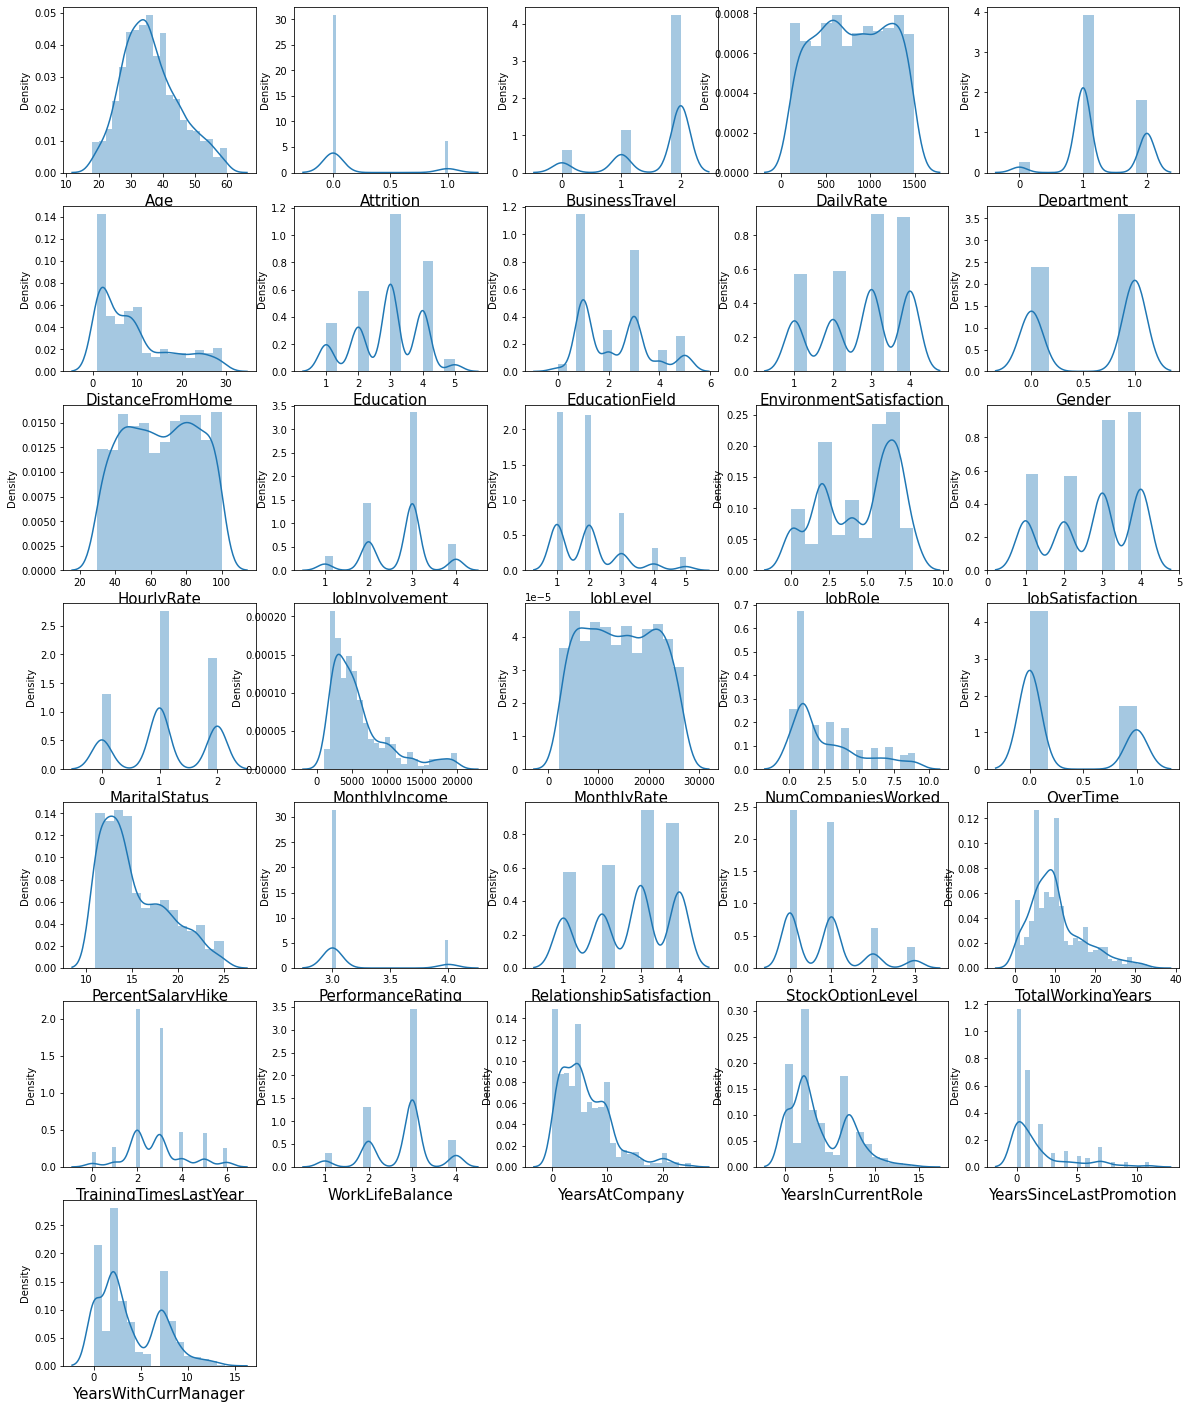

In [59]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in df:
    if plotnum<=31:
        plt.subplot(7,5,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

which show skewness it is categorical data...so it's not important to remove..

# DAta Standarization

In [60]:
#scale the data using StandardScalar for PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[ 0.5366811 ,  0.59312579,  0.73432467, ...,  0.04090327,
        -1.07353381,  0.36826963],
       [ 1.44211114, -0.90535412, -1.30776866, ...,  0.96589518,
         0.19316755,  0.9821999 ],
       [ 0.08396607,  0.59312579,  1.40675151, ..., -1.19241928,
        -1.07353381, -1.16655603],
       ...,
       [-1.04782149,  0.59312579, -1.61544736, ..., -0.575758  ,
        -1.07353381, -0.24566063],
       [ 1.44211114, -0.90535412,  0.53830356, ...,  0.65756454,
        -1.07353381,  1.28916503],
       [-0.2555702 ,  0.59312579, -0.44180199, ..., -0.26742737,
         0.19316755, -0.55262577]])

In [61]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,Age,1.872446
1,BusinessTravel,1.018300
2,DailyRate,1.026432
3,Department,2.150598
4,DistanceFromHome,1.018607
5,Education,1.060508
6,EducationField,1.020398
7,EnvironmentSatisfaction,1.025634
8,Gender,1.023939
9,HourlyRate,1.023883


# PCA (Principal component Analysis )¶

In [62]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

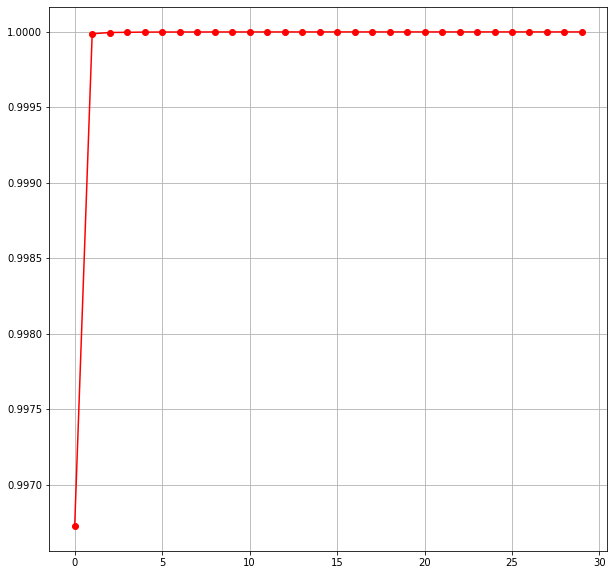

In [63]:
# plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [64]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(x)
x_new

array([[ 5.17409206e+03, -3.04833970e+02, -2.80665308e+01, ...,
        -8.56207633e+00,  3.01974803e-01, -3.97516224e+00],
       [ 1.06034956e+04,  5.08883020e+02,  4.04616840e+00, ...,
        -6.44615286e-01,  3.42348536e+00,  8.18885540e+00],
       [-1.19093471e+04, -5.46562633e+02, -2.53386058e+01, ...,
        -7.04159559e+00, -6.35449502e+00, -5.11986005e-01],
       ...,
       [-9.12926463e+03,  6.66684355e+02, -2.11350047e+01, ...,
        -5.58369874e+00, -9.47244424e-01,  5.05194567e+00],
       [-1.06176218e+03, -2.15132007e+02,  2.99028359e+00, ...,
        -6.25541681e+00,  3.49921078e+00, -9.77798256e-01],
       [-4.07608179e+03,  1.85028136e+02, -1.61264367e+01, ...,
        -1.47240154e+00, -1.34063978e+00, -3.17189546e+00]])

# Kbest feature selection

In [65]:
from sklearn.feature_selection import SelectKBest, f_classif
xbest = x.drop(columns = ['BusinessTravel','HourlyRate','PerformanceRating'])
scaled_x = sc.fit_transform(xbest)

# Finding the best Random State

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .31, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8883720930232558 on Random State: 99


In [67]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .30, random_state=i)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Data Modeling

In [68]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
LOGR.fit(x_train,y_train)
RFC.fit(x_train,y_train)
DTC.fit(x_train,y_train)
SV.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

# Accuracy Score for each model

In [69]:
## Logistic Regression Model Accuracy
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[345  17]
 [ 29  26]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.92      0.95      0.94       362
           1       0.60      0.47      0.53        55

    accuracy                           0.89       417
   macro avg       0.76      0.71      0.73       417
weighted avg       0.88      0.89      0.88       417



In [70]:
# Random Forest Classifier Model Accuracy

RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[358   4]
 [ 44  11]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       362
           1       0.73      0.20      0.31        55

    accuracy                           0.88       417
   macro avg       0.81      0.59      0.63       417
weighted avg       0.87      0.88      0.86       417



In [71]:
# Decision Tree Classifier Model Accuracy
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[291  71]
 [ 30  25]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.91      0.80      0.85       362
           1       0.26      0.45      0.33        55

    accuracy                           0.76       417
   macro avg       0.58      0.63      0.59       417
weighted avg       0.82      0.76      0.78       417



In [72]:
# SV Classifier Model Accuracy
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[352  10]
 [ 35  20]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.91      0.97      0.94       362
           1       0.67      0.36      0.47        55

    accuracy                           0.89       417
   macro avg       0.79      0.67      0.71       417
weighted avg       0.88      0.89      0.88       417



In [73]:
# KNeighbors Classifier Model Accuracy
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)

print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[351  11]
 [ 47   8]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.88      0.97      0.92       362
           1       0.42      0.15      0.22        55

    accuracy                           0.86       417
   macro avg       0.65      0.56      0.57       417
weighted avg       0.82      0.86      0.83       417



# Model Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score as cvs

#Decision Tree Classifier
print("Decision Tree Classifier:" ,cvs(DTC,scaled_x,y,cv=5).mean())

#Logistic Regression
print("Logistic Regression:",cvs(LOGR,scaled_x,y,cv=5).mean())

# Random Forest Classifier
print(" Random Forest Classifier:",cvs(RFC,scaled_x,y,cv=5).mean())


# SV Classifier
print("SV Classifier:",cvs(SV,scaled_x,y,cv=5).mean())

#K Nearest Neighnors Classifier
print("K Nearest Neighnors Classifier:",cvs(KNN,scaled_x,y,cv=5).mean())

Decision Tree Classifier: 0.780806690387762
Logistic Regression: 0.8731111861413396
 Random Forest Classifier: 0.8536373789055398
SV Classifier: 0.870233488299613
K Nearest Neighnors Classifier: 0.8471625587616549


# ROC AUC Scores

In [75]:
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,DTCpred))

#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,LOGRpred))

#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,RFCpred))


#SV Classifier
print("SV Classifier:",roc_auc_score(y_test,SVpred))

#K Nearest Neighbors Classifier
print("K Nearest Neighbors Classifier:",roc_auc_score(y_test,KNNpred))

Decision Tree Classifier: 0.6292064289301859
Logistic Regression: 0.7128829733802108
Random Forest Classifier: 0.594475138121547
SV Classifier: 0.6680060271220493
K Nearest Neighbors Classifier: 0.5575339025615269


# Logistic Regression the best model for the dataset with score 72% score

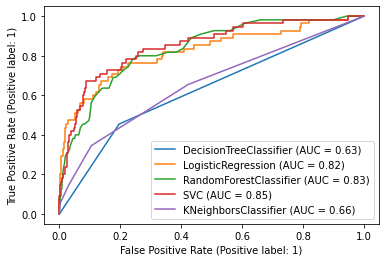

In [76]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,SV,KNN]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

# above graph says, SVC is the best model for the dataset with AUC score 0.85

In [80]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]} 

Gridcv = GridSearchCV(SVC(), param_grid, verbose=1,cv=10)

Gridcv.fit(x_train, y_train)


print("Best Parameters:\n", Gridcv.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Parameters:
 {'C': 100, 'gamma': 0.001}


In [81]:
Gridcv.best_params_

{'C': 100, 'gamma': 0.001}

In [82]:
SVM = SVC(C = 100,gamma = 0.001 ) 
SVM.fit(x_train,y_train)
print('Traning Model accruracy scores: {:.3f}'.format(SVM.score(x_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(SVM.score(x_test,y_test)))

Traning Model accruracy scores: 0.896
Test Model accruracy scores: 0.897


In [84]:
#  Confusion Matrix
y_pred_sm = SVM.predict(x_test)
M_confusao = confusion_matrix(y_test, y_pred_sm)
M_confusao

array([[350,  12],
       [ 31,  24]], dtype=int64)

# Logistic Regression

In [86]:
parameter = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,5,10,20],'solver':['liblinear'],'max_iter':[100,200],'multi_class':['auto', 'ovr', 'multinomial']}
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=7,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 5, 10, 20],
                         'solver': ['liblinear']})

In [87]:
GridCV.best_params_

{'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [88]:
Best_mod2 = LogisticRegression(dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod2.fit(x_train,y_train)
lrpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

88.96882494004797


In [89]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[345,  17],
       [ 29,  26]], dtype=int64)

# after comparing the accuracies and ROC AUC scores of the SV Classifier Model and Logistic Regression Model, SV Classifier Model is performing better

In [106]:
import joblib
joblib.dump(SVM,"Attrirt.pkl")

['Attrirt.pkl']

In [107]:
mod = joblib.load("Attrirt.pkl")
print(mod.predict(x_test))

[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [108]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(y_test)
predicted = np.array(mod.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
412,0,0
413,0,0
414,0,0
415,1,0


# Conclusion

# SVM model gives 89% accuracy..